In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC, LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline

In [2]:
data = pd.read_csv("dataset.csv")
data.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [3]:
#Show the name of the columns, Dtype and Non-null Count
data.info()
print(f'\nColumn names:\n{data.columns}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

In [4]:
# Understanding the dataset's structure and dimensions
print(f'Dataset shape:\n{data.shape}')
print(f'\nColumn names:\n{data.columns}')
print()

#Shows the statistics of all numerical attributes in the dataset
data.describe()

Dataset shape:
(480, 17)

Column names:
Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')



,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,480.000000,480.000000,480.000000,480.000000
mean,46.775000,54.797917,37.918750,43.283333
std,30.779223,33.080007,26.611244,27.637735
min,0.000000,0.000000,0.000000,1.000000
25%,15.750000,20.000000,14.000000,20.000000
50%,50.000000,65.000000,33.000000,39.000000
75%,75.000000,84.000000,58.000000,70.000000
max,100.000000,99.000000,98.000000,99.000000


In [5]:
print(f'Number of Null value in each column in dataset: \n\n{data.isnull().sum()}')

Number of Null value in each column in dataset: 

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64


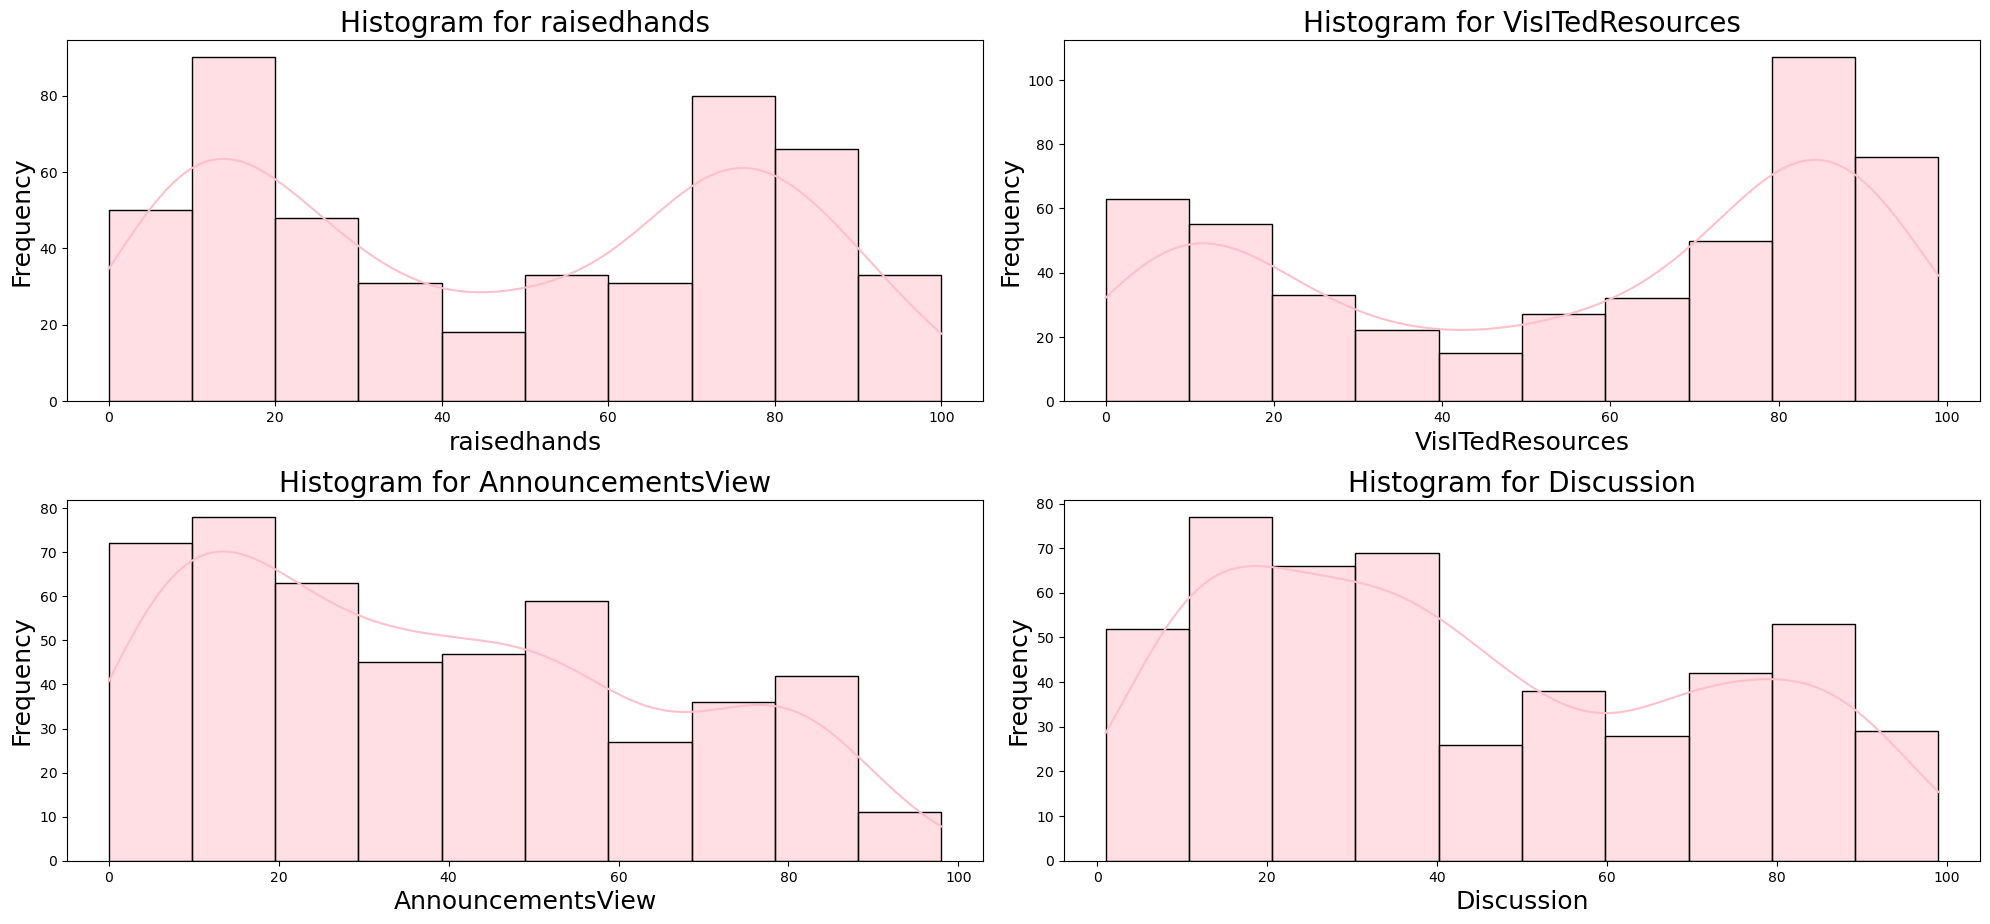

In [6]:
# List of numeric columns
numeric_columns =['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion']

# Set up the matplotlib figure
plt.figure(figsize=(20, 18))

# Loop through the numeric columns and create a subplot for each
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(4, 2, i)  # Adjust number of rows/columns depending on the number of plots
    sns.histplot(data[column], kde=True, color='pink')
    plt.title(f'Histogram for {column}', size=20)
    plt.xlabel(column, size=18)
    plt.ylabel('Frequency', size=18)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [7]:
# List of categorial columns
categorial_col = ['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID', 'SectionID', 'Topic', 'Semester', 'Relation', 'ParentAnsweringSurvey', 'ParentschoolSatisfaction', 'StudentAbsenceDays', 'Class']

#examine the distribution of categories using value counts for categorial data
for column in categorial_col:
    counts = data[column].value_counts()
    print(counts)
    print('------------------------------')

gender
M    305
F    175
Name: count, dtype: int64
------------------------------
NationalITy
KW             179
Jordan         172
Palestine       28
Iraq            22
lebanon         17
Tunis           12
SaudiArabia     11
Egypt            9
Syria            7
USA              6
Iran             6
Lybia            6
Morocco          4
venzuela         1
Name: count, dtype: int64
------------------------------
PlaceofBirth
KuwaIT         180
Jordan         176
Iraq            22
lebanon         19
SaudiArabia     16
USA             16
Palestine       10
Egypt            9
Tunis            9
Iran             6
Syria            6
Lybia            6
Morocco          4
venzuela         1
Name: count, dtype: int64
------------------------------
StageID
MiddleSchool    248
lowerlevel      199
HighSchool       33
Name: count, dtype: int64
------------------------------
GradeID
G-02    147
G-08    116
G-07    101
G-04     48
G-06     32
G-11     13
G-12     11
G-09      5
G-10      4
G-05  

Class
M    211
H    142
L    127
Name: count, dtype: int64

Number of students with Middle-Level grade (70-89) are 211, 
Number of students with High-Level grade (90-100 are) 142 and 
Number of students with Low-Level grade (0-69) are 127


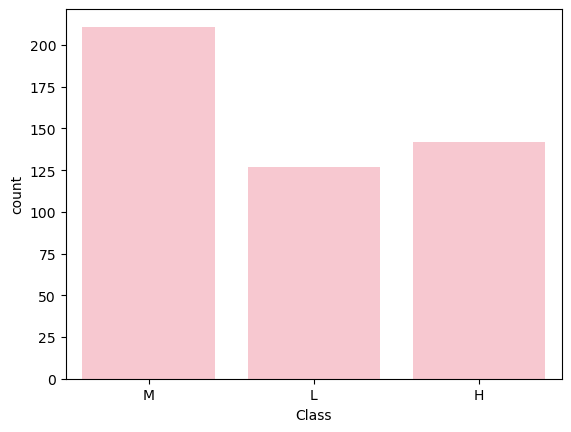

In [8]:
x=(data['Class'].value_counts())
print(x)

sns.countplot(data=data, x="Class", color='pink')
print(f'\nNumber of students with Middle-Level grade (70-89) are {x.iloc[0]}, \nNumber of students with High-Level grade (90-100 are) {x.iloc[1]} and \nNumber of students with Low-Level grade (0-69) are {x.iloc[2]}')


In [9]:
cat_att = ['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID', 'SectionID', 'Topic', 'Semester', 'Relation', 'ParentAnsweringSurvey', 'ParentschoolSatisfaction', 'StudentAbsenceDays']         
num_att = ['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion']

In [10]:
train, test = train_test_split(data, test_size=0.2, random_state=42)
train.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
132,M,KW,KuwaIT,lowerlevel,G-02,C,IT,S,Father,0,3,10,3,No,Bad,Above-7,L
228,M,KW,KuwaIT,HighSchool,G-11,B,Math,S,Mum,73,84,77,81,Yes,Good,Above-7,H
473,M,Palestine,Palestine,MiddleSchool,G-08,A,Geology,S,Father,85,88,79,70,Yes,Good,Under-7,M
42,M,KW,KuwaIT,HighSchool,G-09,A,IT,F,Father,10,12,7,33,Yes,Good,Above-7,L
360,M,Jordan,Jordan,lowerlevel,G-02,A,Arabic,F,Father,20,88,31,28,Yes,Good,Above-7,M


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 384 entries, 132 to 102
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    384 non-null    object
 1   NationalITy               384 non-null    object
 2   PlaceofBirth              384 non-null    object
 3   StageID                   384 non-null    object
 4   GradeID                   384 non-null    object
 5   SectionID                 384 non-null    object
 6   Topic                     384 non-null    object
 7   Semester                  384 non-null    object
 8   Relation                  384 non-null    object
 9   raisedhands               384 non-null    int64 
 10  VisITedResources          384 non-null    int64 
 11  AnnouncementsView         384 non-null    int64 
 12  Discussion                384 non-null    int64 
 13  ParentAnsweringSurvey     384 non-null    object
 14  ParentschoolSatisfaction  384

In [12]:
train['Class'].value_counts()

Class
M    163
H    120
L    101
Name: count, dtype: int64

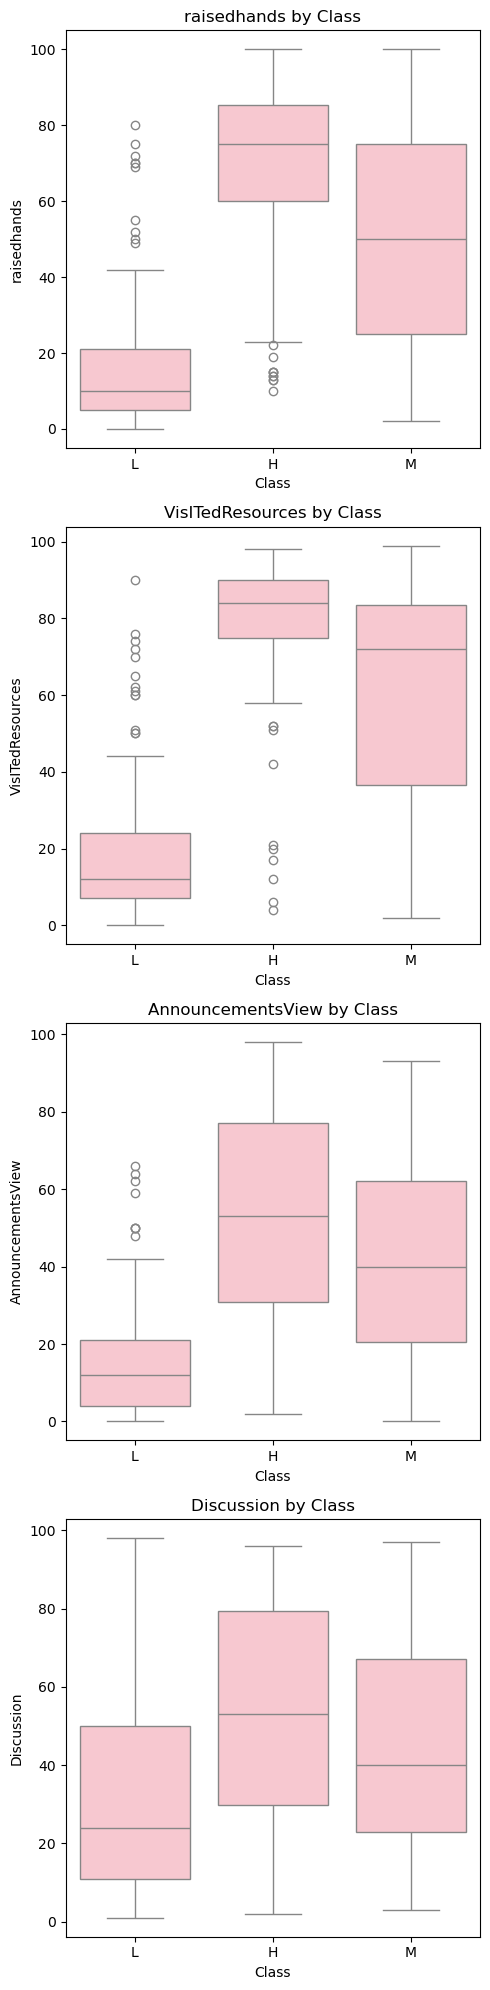

In [13]:
n_cat = 1
n_cont = len(num_att)

fig, axes = plt.subplots(nrows=n_cont, ncols=n_cat, figsize=(5*n_cat, 5*n_cont), sharex=False, sharey=False)

for i, cont_col in enumerate(num_att):
    sns.boxplot(x=train['Class'], y=cont_col, data=train, ax=axes[i], color='pink')
    axes[i].set_title(f'{cont_col} by {"Class"}')

plt.tight_layout()
plt.show()

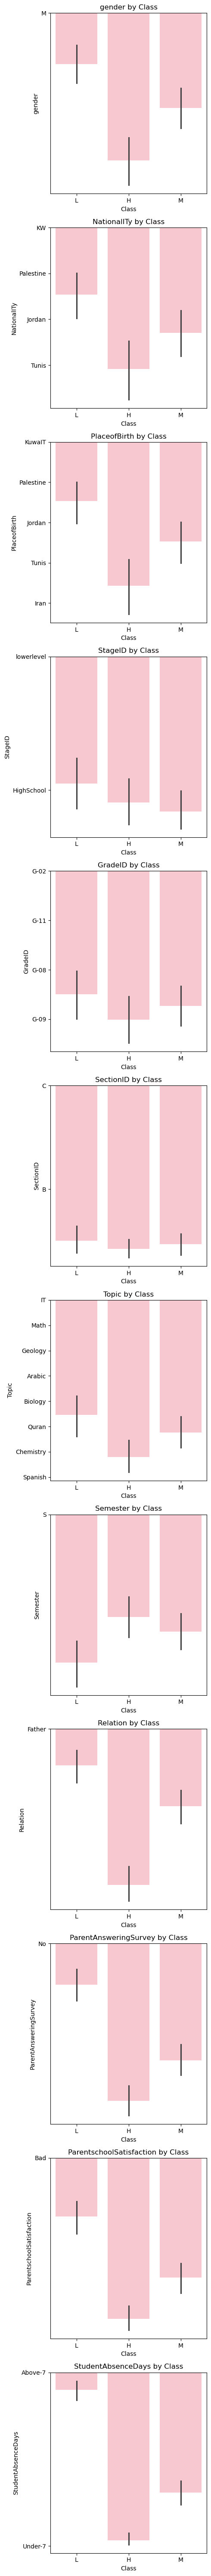

In [14]:
n_cat = 1
n_cont = len(cat_att)

fig, axes = plt.subplots(nrows=n_cont, ncols=n_cat, figsize=(5*n_cat, 5*n_cont), sharex=False, sharey=False)

for i, cont_col in enumerate(cat_att):
    sns.barplot(x=train['Class'], y=cont_col, data=train, ax=axes[i], color='pink')
    axes[i].set_title(f'{cont_col} by {"Class"}')

plt.tight_layout()
plt.show()

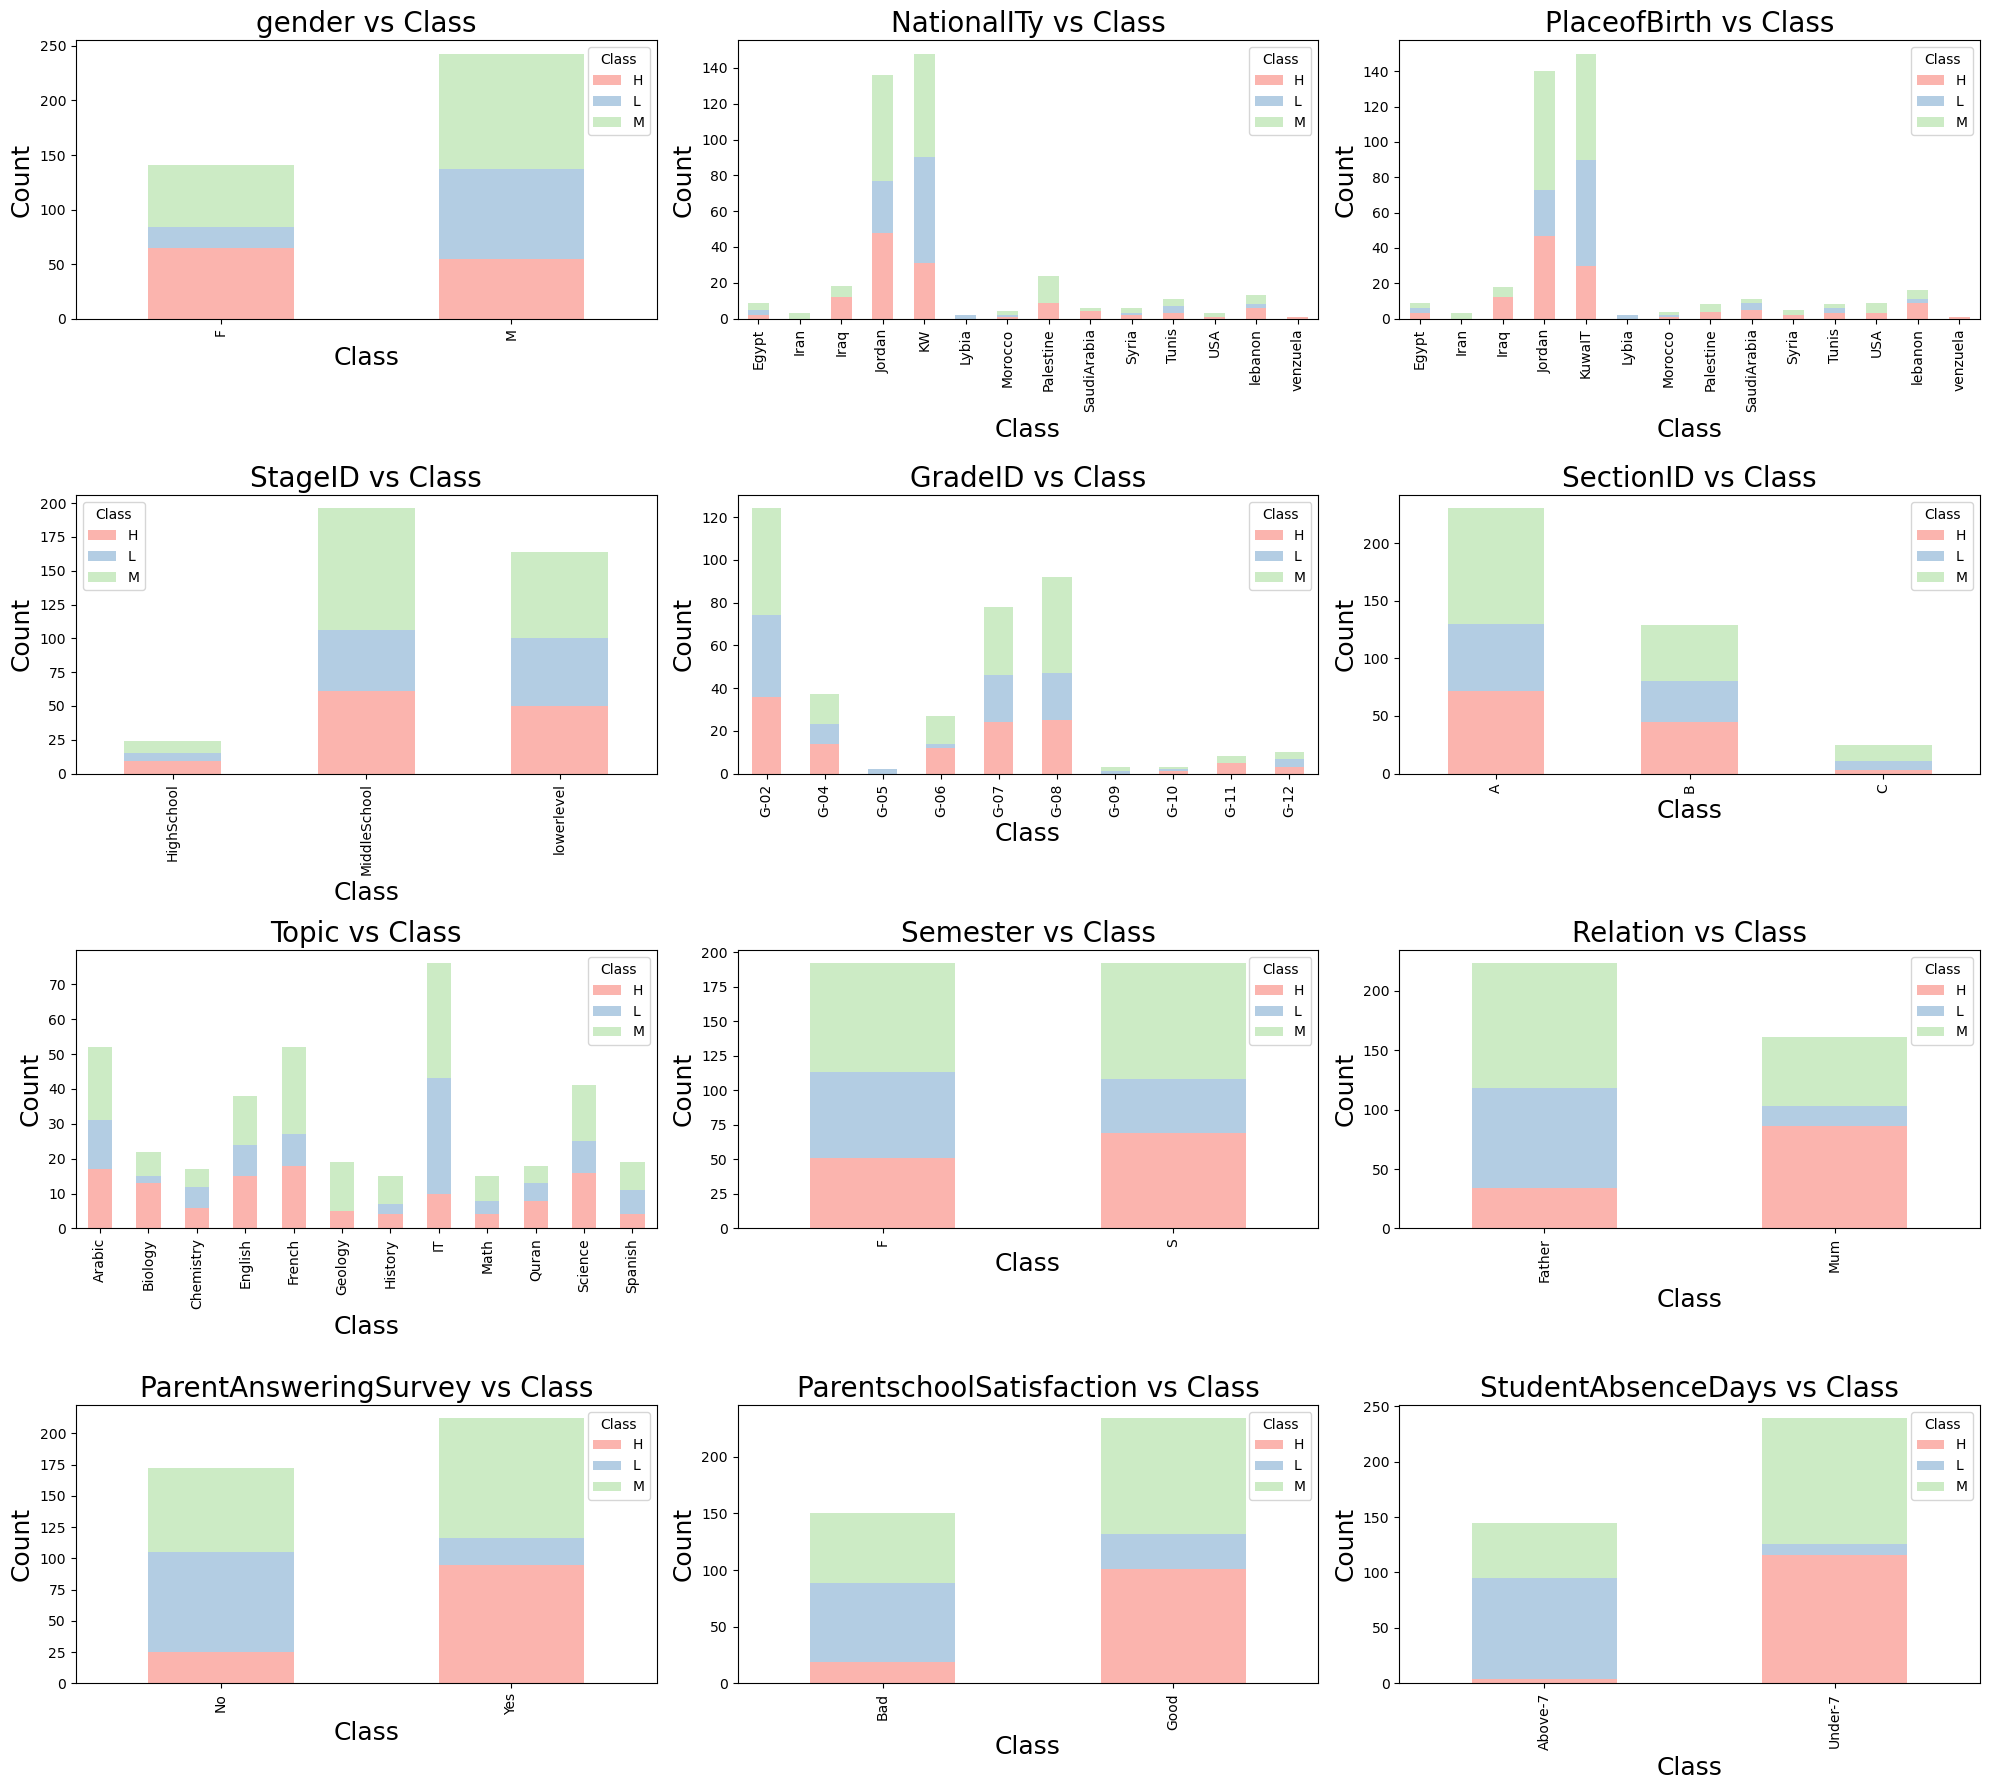

In [15]:
# Create a custom palette using 'Pastel1'
pastel_palette = sns.color_palette('Pastel1', n_colors=len(train['Class'].unique()))

# Set up the matplotlib figure
plt.figure(figsize=(20, 18))

# Adjust the number of subplots based on the number of categorical attributes
total_plots = len(cat_att)
grid_rows = (total_plots // 3) + 1 if total_plots % 3 != 0 else total_plots // 3

# Loop through the categorical columns and create a subplot for each
for i, column in enumerate(cat_att, 1):
    plt.subplot(grid_rows, 3, i)  # Adjust the number of rows/columns depending on the number of plots
    
    # Create a cross-tabulation to count occurrences of each 'Class' per 'column' category
    ct = pd.crosstab(train[column], train['Class'])
    
    # Plot the bar plot with categorical attribute on y-axis and 'Class' on x-axis
    ct.plot(kind='bar', stacked=True, ax=plt.gca(), color=pastel_palette)  # Use current axis to plot
    
    plt.title(f'{column} vs Class', size=20)
    plt.xlabel('Class', size=18)
    plt.ylabel('Count', size=18)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [16]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

Class = train.drop("Class", axis=1) #X
Class_grades = train['Class'].copy() #y

cat_att = ['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID', 'SectionID', 'Topic', 'Semester', 'Relation', 'ParentAnsweringSurvey', 'ParentschoolSatisfaction', 'StudentAbsenceDays']         
num_att = ['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion']

num_pipeline = make_pipeline(
    SimpleImputer(strategy="median"), 
    # you may add log transformation if needed
    StandardScaler()
)

cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore")
)

# Column transformer
preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_att),
    ("catt", cat_pipeline, cat_att)
])

class_prepared = preprocessing.fit_transform(Class)

In [17]:
preprocessing

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['raisedhands', 'VisITedResources',
                                  'AnnouncementsView', 'Discussion']),
                                ('catt',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['gender', 'NationalITy', 'PlaceofBirth',
                                  'StageID', 'GradeID', 'SectionID', 'Topic',
                                  'Semester', 'Relation',
                                  'ParentAnsweringSurvey',
                                  'ParentschoolSatisfaction',
                                  'StudentAbsenceDays'])])

In [18]:
from sklearn.preprocessing import LabelEncoder

lencoder = LabelEncoder()
lencoder.fit(Class_grades)
Class_grades = lencoder.transform(Class_grades)
Class_grades

array([1, 0, 2, 1, 2, 1, 1, 0, 2, 2, 0, 2, 2, 1, 2, 2, 2, 0, 2, 1, 0, 1,
       0, 1, 2, 2, 2, 0, 1, 0, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1,
       2, 0, 2, 1, 2, 1, 0, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0,
       2, 1, 2, 0, 2, 0, 2, 1, 1, 2, 0, 2, 0, 0, 2, 1, 2, 1, 2, 0, 0, 0,
       2, 2, 0, 0, 2, 0, 1, 0, 0, 1, 2, 2, 2, 1, 2, 2, 2, 2, 0, 2, 1, 0,
       2, 1, 2, 0, 0, 2, 2, 2, 1, 1, 0, 2, 1, 0, 2, 1, 1, 2, 0, 2, 1, 1,
       1, 0, 0, 0, 2, 1, 0, 0, 2, 2, 1, 0, 2, 2, 2, 1, 0, 0, 2, 0, 2, 0,
       0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 1, 0, 1, 1, 0, 0,
       2, 1, 0, 2, 0, 1, 0, 2, 1, 2, 2, 1, 2, 0, 0, 0, 2, 0, 2, 1, 2, 0,
       0, 2, 2, 1, 2, 2, 0, 1, 2, 1, 2, 2, 0, 2, 0, 1, 0, 2, 2, 1, 0, 1,
       1, 2, 2, 1, 1, 2, 0, 2, 0, 0, 2, 0, 1, 0, 1, 0, 0, 2, 1, 2, 0, 0,
       0, 2, 0, 0, 2, 1, 0, 1, 2, 2, 0, 1, 2, 0, 1, 2, 1, 0, 1, 1, 2, 2,
       1, 2, 0, 2, 0, 0, 0, 1, 0, 2, 1, 1, 1, 1, 0, 2, 1, 2, 0, 2, 2, 0,
       2, 2, 1, 2, 0, 2, 2, 1, 1, 2, 2, 1, 2, 0, 2,

In [19]:
lencoder.classes_

array(['H', 'L', 'M'], dtype=object)

## Model Training

In [20]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = make_pipeline(preprocessing, RandomForestClassifier(random_state=42))
forest_clf

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['raisedhands',
                                                   'VisITedResources',
                                                   'AnnouncementsView',
                                                   'Discussion']),
                                                 ('catt',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['gender', 'NationalITy',
                                                   'PlaceofBirth', 'StageID',
                                                   'GradeID', 'SectionID',
                                                   'Topic', 'Semester',
                                                   'Relation',
                                                   'ParentAnsweringSurvey',
                                                   'ParentschoolSatisfaction',
                                                   'StudentAbsenceDays'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

In [23]:
forest_acc = cross_val_score(forest_clf, 
                            Class, Class_grades,
                            scoring="accuracy",
                            cv=10)
print(forest_acc)


[0.71794872 0.82051282 0.69230769 0.74358974 0.84210526 0.81578947
 0.73684211 0.89473684 0.76315789 0.84210526]


In [24]:
pd.Series(forest_acc).describe()

count    10.000000
mean      0.786910
std       0.065265
min       0.692308
25%       0.738529
50%       0.789474
75%       0.836707
max       0.894737
dtype: float64

In [25]:
print(f"Mean Accuracy: {np.mean(forest_acc)}")
print(f"Standard Deviation of Accuracy: {np.std(forest_acc)}")

Mean Accuracy: 0.7869095816464238
Standard Deviation of Accuracy: 0.061915823356880284


### If the mean accuracy is high (closer to 1) and the standard deviation is low, it indicates that the model is consistently performing well across different folds. Conversely, a high standard deviation suggests that the model's performance is inconsistent, and further tuning or validation might be required.

In [26]:
tree_clf = make_pipeline(preprocessing, DecisionTreeClassifier(random_state=42))
tree_clf

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['raisedhands',
                                                   'VisITedResources',
                                                   'AnnouncementsView',
                                                   'Discussion']),
                                                 ('catt',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['gender', 'NationalITy',
                                                   'PlaceofBirth', 'StageID',
                                                   'GradeID', 'SectionID',
                                                   'Topic', 'Semester',
                                                   'Relation',
                                                   'ParentAnsweringSurvey',
                                                   'ParentschoolSatisfaction',
                                                   'StudentAbsenceDays'])])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

In [27]:
tree_acc = cross_val_score(tree_clf, 
                              Class, Class_grades,
                              scoring="accuracy", 
                              cv=10)

tree_acc

array([0.66666667, 0.79487179, 0.74358974, 0.61538462, 0.81578947,
       0.76315789, 0.73684211, 0.78947368, 0.68421053, 0.73684211])

In [28]:
pd.Series(tree_acc).describe()

count    10.000000
mean      0.734683
std       0.062812
min       0.615385
25%       0.697368
50%       0.740216
75%       0.782895
max       0.815789
dtype: float64

In [29]:
print(f"Mean Accuracy: {np.mean(tree_acc)}")
print(f"Standard Deviation of Accuracy: {np.std(tree_acc)}")

Mean Accuracy: 0.7346828609986504
Standard Deviation of Accuracy: 0.05958879100313084


In [30]:
svm_clf = make_pipeline(preprocessing, SVC(random_state=42))
svm_clf 

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['raisedhands',
                                                   'VisITedResources',
                                                   'AnnouncementsView',
                                                   'Discussion']),
                                                 ('catt',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['gender', 'NationalITy',
                                                   'PlaceofBirth', 'StageID',
                                                   'GradeID', 'SectionID',
                                                   'Topic', 'Semester',
                                                   'Relation',
                                                   'ParentAnsweringSurvey',
                                                   'ParentschoolSatisfaction',
                                                   'StudentAbsenceDays'])])),
                ('svc', SVC(random_state=42))])

In [31]:
svm_acc = cross_val_score(svm_clf , 
                            Class, Class_grades,
                            scoring="accuracy",
                            cv=10)
print(svm_acc)

[0.74358974 0.84615385 0.74358974 0.69230769 0.78947368 0.81578947
 0.81578947 0.76315789 0.76315789 0.81578947]


In [38]:
print(f"Mean Accuracy: {np.mean(svm_acc)}")
print(f"Standard Deviation of Accuracy: {np.std(svm_acc)}")

Mean Accuracy: 0.7788798920377868
Standard Deviation of Accuracy: 0.04382335257176242


In [32]:
log_reg = make_pipeline(preprocessing, LogisticRegression(random_state=42))
log_reg

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['raisedhands',
                                                   'VisITedResources',
                                                   'AnnouncementsView',
                                                   'Discussion']),
                                                 ('catt',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['gender', 'NationalITy',
                                                   'PlaceofBirth', 'StageID',
                                                   'GradeID', 'SectionID',
                                                   'Topic', 'Semester',
                                                   'Relation',
                                                   'ParentAnsweringSurvey',
                                                   'ParentschoolSatisfaction',
                                                   'StudentAbsenceDays'])])),
                ('logisticregression', LogisticRegression(random_state=42))])

In [33]:
log_scores = cross_val_score(log_reg, 
                            Class, Class_grades,
                            scoring="accuracy",
                            cv=10)
print(log_scores)

[0.71794872 0.79487179 0.82051282 0.74358974 0.84210526 0.76315789
 0.78947368 0.78947368 0.76315789 0.73684211]


In [35]:
pd.Series(log_scores).describe()

count    10.000000
mean      0.776113
std       0.038520
min       0.717949
25%       0.748482
50%       0.776316
75%       0.793522
max       0.842105
dtype: float64

In [36]:
print(f"Mean Accuracy: {np.mean(log_scores)}")
print(f"Standard Deviation of Accuracy: {np.std(log_scores)}")

Mean Accuracy: 0.7761133603238866
Standard Deviation of Accuracy: 0.03654305624796805
